Text(0.5,1,'$\\sigma$')

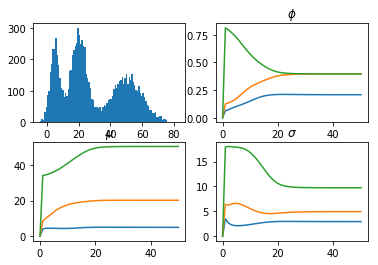

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 一元高斯概率密度函数
def norm(x, mu, sigma):
    return np.squeeze(1 / (np.sqrt(2*np.pi)*sigma) * np.exp(-np.power(x-mu, 2)/(2*sigma*sigma)))

# 生成样本
phi1, mu1, sigma1 = [0.2, 5, 3]
phi2, mu2, sigma2 = [0.4, 20, 5]
phi3, mu3, sigma3 = [0.4, 50, 10]

N = 10000 # 样本点个数
x = np.zeros((N, 1))
for i in range(N):
    rate = np.random.rand()
    if rate <= phi1:
        x[i] = np.random.normal(mu1, sigma1)
    elif rate <= phi1 + phi2:
        x[i] = np.random.normal(mu2, sigma2)
    else:
        x[i] = np.random.normal(mu3, sigma3)
        
# 画出样本分布直方图
plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(x, 100)

# 学习过程
mu = [0, 5, 10]
sigma = [5, 5, 5]
phi = [0.33, 0.33, 0.34]
w = np.zeros((N, 3))

T = 50 # 迭代次数

# --初始化存储变量，存放每次训练后的值
mu_ = np.zeros((T+1, 3))
sigma_ = np.zeros((T+1, 3))
phi_ = np.zeros((T+1, 3))

# --将初始值放存储变量第一行
mu_[1, :] = mu
sigma_[1,:] = sigma
phi_[1, :] = phi

# --开始训练
for t in range(T):
    # --Expactation
    for k in range(3):
#         print(w[:, k].shape)
#         print(norm(x, mu[k], sigma[k]).shape)
        w[:, k] = phi[k] * norm(x, mu[k], sigma[k])
    
    w = w / np.tile(np.sum(w, 1).reshape(N, 1), [1, 3])
    
    # --Maximization
    for k in range(3):
        mu[k] = np.dot(w[:, k], x) / sum(w[:, k])
        sigma[k] = np.sqrt(np.dot(w[:, k].T, (x - mu[k]) * (x - mu[k])) / np.sum(w[:, k]))
        phi[k] = np.sum(w[:, k]) / N
        
    mu_[t+1, :] = mu
    sigma_[t+1, :] = sigma
    phi_[t+1, :] = phi
    
plt.subplot(2, 2, 2)
plt.plot(phi_)
plt.title(r'$\phi$')
plt.subplot(2, 2, 3)
plt.plot(mu_)
plt.title(r'$\mu$')
plt.subplot(2, 2, 4)
plt.plot(sigma_)
plt.title(r'$\sigma$')

In [84]:
import numpy as np

a = np.zeros((100, 3))
b = np.ones((100, 1))

a[:, 0] = b.squeeze()

c = np.sum(a, 1)

d = np.tile(c, [3,1])
d

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1